## Workgroup 6
### Members:
* Juan José Tang
* Victoria Olivera
* Ursula Cotrina

In [35]:
#!pip install econml

In [36]:
import random
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

random.seed(1)

In [37]:
data_all = pd.read_csv("https://raw.githubusercontent.com/grf-labs/grf/master/experiments/acic18/synthetic_data.csv")
data_all["schoolid"] = pd.Categorical(data_all["schoolid"])
data_all

,schoolid,Z,Y,S3,C1,C2,C3,XC,X1,X2,X3,X4,X5
0,76,1,0.081602,6,4,2,1,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
1,76,1,-0.385869,4,12,2,1,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
2,76,1,0.398184,6,4,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
3,76,1,-0.175037,6,4,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
4,76,1,0.884583,6,4,1,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10386,1,0,0.423366,7,4,2,1,3,1.185986,-1.129889,1.009875,1.005063,-1.174702
10387,1,0,-0.197092,7,4,2,1,3,1.185986,-1.129889,1.009875,1.005063,-1.174702
10388,1,0,0.141698,2,15,1,1,3,1.185986,-1.129889,1.009875,1.005063,-1.174702
10389,1,0,-0.351565,5,4,1,1,3,1.185986,-1.129889,1.009875,1.005063,-1.174702


In [38]:
DF = data_all.iloc[:,1:]
school_id = pd.to_numeric(data_all["schoolid"])

In [39]:
school_mat = np.zeros([data_all.shape[0],max(school_id)])

#This is the function model.matrix in python
for i in range(data_all.shape[0]):
    school_mat[i,data_all["schoolid"][i]-1] = 1
    
school_size = school_mat.sum(axis=0)

In [40]:
data_all3= data_all.drop(['Y'], axis=1)
data_all3

,schoolid,Z,S3,C1,C2,C3,XC,X1,X2,X3,X4,X5
0,76,1,6,4,2,1,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
1,76,1,4,12,2,1,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
2,76,1,6,4,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
3,76,1,6,4,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
4,76,1,6,4,1,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
...,...,...,...,...,...,...,...,...,...,...,...,...
10386,1,0,7,4,2,1,3,1.185986,-1.129889,1.009875,1.005063,-1.174702
10387,1,0,7,4,2,1,3,1.185986,-1.129889,1.009875,1.005063,-1.174702
10388,1,0,2,15,1,1,3,1.185986,-1.129889,1.009875,1.005063,-1.174702
10389,1,0,5,4,1,1,3,1.185986,-1.129889,1.009875,1.005063,-1.174702


In [41]:
data_all3.columns

Index(['schoolid', 'Z', 'S3', 'C1', 'C2', 'C3', 'XC', 'X1', 'X2', 'X3', 'X4',
       'X5'],
      dtype='object')

In [42]:
formula = 'Z ~ schoolid + S3+ C1+ C2+ C3+ XC+ X1+ X2+ X3+ X4+ X5'

In [43]:
model = smf.glm(formula = formula, data=data_all3, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Z   No. Observations:                10391
Model:                            GLM   Df Residuals:                    10311
Model Family:                Binomial   Df Model:                           79
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6504.4
Date:                Sat, 25 Jun 2022   Deviance:                       13009.
Time:                        11:58:46   Pearson chi2:                 1.04e+04
No. Iterations:                    19   Pseudo R-squ. (CS):            0.01016
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0478      0.140     -7.

### Grow a forest. Add extra trees for the causal forest.

In [44]:
import econml
# Main imports
from econml.orf import DMLOrthoForest, DROrthoForest
from econml.dml import CausalForestDML
from econml.sklearn_extensions.linear_model import WeightedLassoCVWrapper, WeightedLasso, WeightedLassoCV
from sklearn.linear_model import MultiTaskLassoCV
# Helper imports
import numpy as np
from itertools import product
from sklearn.linear_model import Lasso, LassoCV, LogisticRegression, LogisticRegressionCV
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from econml.grf import RegressionForest
%matplotlib inline
import patsy
import seaborn as sns

In [45]:
W = DF["Z"]
Y = data_all["Z"]
X_raw = DF.iloc[:,2:]

In [46]:
X_raw.columns

Index(['S3', 'C1', 'C2', 'C3', 'XC', 'X1', 'X2', 'X3', 'X4', 'X5'], dtype='object')

In [47]:
C1_exp = pd.get_dummies(DF["C1"],prefix = "C1")
XC_exp = pd.get_dummies(DF["XC"],prefix = "XC")


In [48]:
X = pd.concat([X_raw.drop(columns=["C1","XC"]),C1_exp,XC_exp],axis=1)

In [49]:
X.columns

Index(['S3', 'C2', 'C3', 'X1', 'X2', 'X3', 'X4', 'X5', 'C1_1', 'C1_2', 'C1_3',
       'C1_4', 'C1_5', 'C1_6', 'C1_7', 'C1_8', 'C1_9', 'C1_10', 'C1_11',
       'C1_12', 'C1_13', 'C1_14', 'C1_15', 'XC_0', 'XC_1', 'XC_2', 'XC_3',
       'XC_4'],
      dtype='object')

In [50]:
# Preparing data to fit a causal forest

fmla = 'schoolid + S3+ C1+ C2+ C3+ XC+ X1+ X2+ X3+ X4+ X5'
desc = patsy.ModelDesc.from_formula(fmla)
desc.describe()
matrix = patsy.dmatrix(fmla, data_all, return_type = "dataframe")

W = DF["Z"] #treatment
#Y = data_all["Z"] #post-treatment
Y = DF['Y']
#X_raw = DF.iloc[:,2:]
X = matrix
W_n = None

#T = data.loc[ : ,"w"] treat
#Y = data.loc[ : ,"y"] post t
#X = matrix
#W = None 

# Estimate a causal forest.
est2 = CausalForestDML(model_t=RegressionForest(),
                       model_y=RegressionForest(),
                       n_estimators=200, min_samples_leaf=5,
                       max_depth=50,
                       verbose=0, random_state=123)

#est2.tune(Y, W, X=X_raw, W=W_n)
#est2.fit(Y, W, X=X_raw, W=W_n)
est2.tune(Y, W, X=X, W=W_n)
est2.fit(Y, W, X=X, W=W_n)

In [51]:
# Get residuals  and propensity 
#residuals = est2.fit(Y, W, X=X_raw, W=W_n, cache_values=True).residuals_
residuals = est2.fit(Y, W, X=X, W=W_n, cache_values=True).residuals_
W_res = residuals[1]
e_hat = W - W_res 

# T = beta_hat*X + e , beta_hat*X = T_hat = T-e

In [52]:
Prop = pd.DataFrame({"p_score":e_hat, "Treatment":W})

<AxesSubplot:xlabel='p_score', ylabel='Count'>

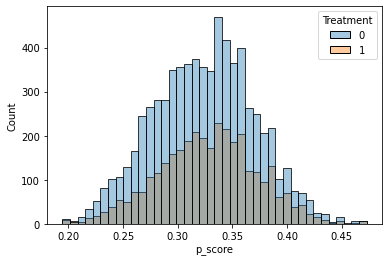

In [53]:
sns.histplot(data=Prop, x="p_score", hue="Treatment", bins=40, alpha = 0.4)

In [54]:
#tau_hat = est2.effect(X=X_raw) # tau(X) estimates
tau_hat = est2.effect(X=X) # tau(X) estimates

In [55]:
tau_hat

array([0.25631838, 0.24075095, 0.25814032, ..., 0.20896438, 0.20751577,
       0.19553536])

In [56]:
max(tau_hat)

Text(0.5, 1.0, 'CATE estimates')

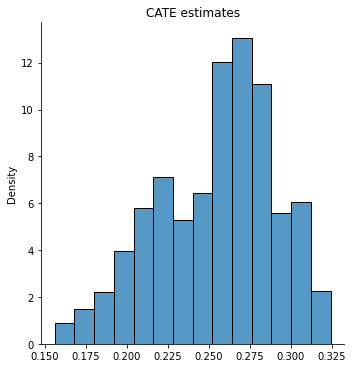

In [57]:
# Do not use this for assessing heterogeneity. See text above.
sns.displot( tau_hat, stat="density", bins = 14)
plt.title("CATE estimates")

If the histogram is concentrated at a point, we may simply be underpowered: our method was not able to detect any heterogeneity, but maybe it would detect it if we had more data. If the histogram is spread out, we may be overfitting: our model is producing very noisy estimates $\widehat{\tau}(x)$, but in fact the true  $\tau(x)$ can be much smoother as a function of $x$.

The `grf` package also produces a measure of variable importance that indicates how often a variable was used in a tree split. Again, much like the histogram above, this can be a rough diagnostic, but it should not be interpreted as indicating that, for example, variable with low importance is not related to heterogeneity. The reasoning is the same as the one presented in the causal trees section: if two covariates are highly correlated, the trees might split on one covariate but not the other, even though both (or maybe neither) are relevant in the true data-generating process.

In [58]:
est2.feature_importances()

array([0.00000000e+00, 2.13568628e-04, 0.00000000e+00, 9.69325393e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.34027170e-03, 0.00000000e+00, 0.00000000e+00, 4.96192083e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.71128389e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [59]:
importance = pd.DataFrame({"covariaties" : list(X.columns), "values" : est2.feature_importances()})

In [60]:
importance.sort_values('values', ascending = False)

,covariaties,values
81,X1,0.226762
85,X5,0.206942
82,X2,0.133997
77,C1,0.102825
84,X4,0.085426
...,...,...
29,schoolid[T.30],0.000000
28,schoolid[T.29],0.000000
26,schoolid[T.27],0.000000
25,schoolid[T.26],0.000000


#### Data-driven subgroups

Just as with causal trees, we can use causal forests to divide our observations into subgroups. In place of leaves, we'll rank observation into (say) quintiles according to their estimated CATE prediction; see, e.g., [Chernozhukov, Demirer, Duflo, Fernández-Val (2020)](https://arxiv.org/abs/1712.04802) for similar ideas.

There's a subtle but important point that needs to be addressed here. As we have mentioned before, when predicting the conditional average treatment effect $\tau(X_i)$ for observation $i$ we should in general avoid using a model that was fitted using observation $i$. This sort of sample splitting (which we called **honesty** above) is one of the required ingredients to get unbiased estimates of the CATE using the methods described here. However, when ranking estimates of two observations $i$ and $j$, we need something a little stronger: we must ensure that the model was not fit using _either_ $i$ _or_ $j$'s data. 

One way of overcoming this obstacle is simple. First, divide the data into $K$ folds (subsets). Then, cycle through the folds, fitting a CATE model on $K-1$ folds. 

In [61]:
#fmla = 'schoolid + S3+ C1+ C2+ C3+ XC+ X1+ X2+ X3+ X4+ X5'
fmla = '0+ schoolid + S3+ C1+ C2+ C3+ XC+ X1+ X2+ X3+ X4+ X5'
desc = patsy.ModelDesc.from_formula(fmla)
desc.describe()
matrix = patsy.dmatrix(fmla, data_all, return_type = "dataframe")

W = DF["Z"] #treatment
#Y = data_all["Z"] #post-treatment
Y = DF["Y"] #post-treatment
#X_raw = DF.iloc[:,2:]
W_n = None


In [62]:
def cluster_causal_forest(Y,T, X, W,  cluster):        
        
        base = pd.concat([Y,T], axis = 1)
        
        for i in range(cluster):
        
            index=range(X.shape[0]) 
            a = np.array_split(np.array(index),cluster)[i]  ## split index
            
            Y = base.drop(base.iloc[list(a),:].index).iloc[:,0]
            T = base.drop(base.iloc[list(a),:].index).iloc[:,1]
            XX = X.drop(X.iloc[list(a),:].index)
            causal = CausalForestDML(model_t=RegressionForest(),
                       model_y=RegressionForest(),
                       n_estimators=200, min_samples_leaf=5,
                       max_depth=50,
                       verbose=0, random_state=123)
            causal.fit(Y, T, X=XX, W=W)
            
            tau_hat = causal.effect(X=X.iloc[list(a),:]) # tau(X) estimates using validation data
            vector = i*np.ones( len(list(a)) ) + 1
            globals()[f'data_{i}'] = pd.DataFrame({"tau_hat":tau_hat, "Cluster":vector})
                                                    
        
       
        tau_predict = data_0.copy()

        for k in range(1,10):
            tau_predict = tau_predict.append(globals()[f'data_{k}'] , ignore_index=True)
            
        
        
        return tau_predict

In [63]:
num_folds = 10

In [64]:
tau_hat_cluster = cluster_causal_forest(Y,W, X, W_n,  cluster = num_folds)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [65]:
tau_hat_cluster

,tau_hat,Cluster
0,0.334594,1.0
1,0.193886,1.0
2,0.272197,1.0
3,0.272197,1.0
4,0.304977,1.0
...,...,...
10386,0.173791,10.0
10387,0.173791,10.0
10388,0.121530,10.0
10389,0.139009,10.0


## 2. Estimating the ATE

### OLS ATE

In [147]:
# Valid only in randomized settings.
# Average difference-in-means within each ranking

# Formula y ~ 0 + ranking + ranking:w
#fmla = 'Y ~ W'
fmla= '0+ Y ~ W'
ols = smf.ols(fmla, data=data_all).fit(cov_type='HC2')

# Retrieve the interaction coefficients
#ols_1 = ols.summary2().tables[1].reset_index()
#ols_ate = ols_1.loc[ols_1["index"].str.contains("w:")].iloc[:,1:3]
#ols_ate['method'] = "ols"
#ols_ate['ranking'] = [f'Q{j}' for j in range(1,6)]
#order = [2,3,0,1] # setting column's order
#ols_ate = ols_ate[[ols_ate.columns[i] for i in order]]

In [148]:
ols.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.049     
Dependent Variable: Y                AIC:                19792.2094
Date:               2022-06-25 13:42 BIC:                19806.7068
No. Observations:   10391            Log-Likelihood:     -9894.1   
Df Model:           1                F-statistic:        527.7     
Df Residuals:       10389            Prob (F-statistic): 6.13e-114 
R-squared:          0.049            Scale:              0.39324   
--------------------------------------------------------------------
                Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
--------------------------------------------------------------------
Intercept      -0.1956    0.0074  -26.2896  0.0000  -0.2102  -0.1811
W               0.3037    0.0132   22.9706  0.0000   0.2778   0.3296
-------------------------------------------------------------------
Omnibus:              46.208        Durbin-Watson:           1.807 
Prob(Omnibus):        0.000         Jarque-Bera (JB):        41.932
Skew:                 0.116         Prob(JB):                0.000 
Kurtosis:             2.792         Condition No.:           2     
===================================================================

"""

In [149]:
ols_ate=ols.summary2().tables[1].iloc[1,0]
ols_ate

## 3. Running  best linear predictor analysis

In [69]:
tau_hat = est2.effect(X=X)

In [70]:
# Computing AIPW scores.
tau_hat = est2.effect(X=X) #E[Y|X]

residuals = est2.fit(Y, W, X=X, W=W_n, cache_values=True).residuals_
W_res = residuals[1]
e_hat = W - W_res  # P[W=1|X]

Y_res = residuals[0]
m_hat = Y - Y_res # E[Y|X]


# Estimating mu.hat(X, 1) and mu.hat(X, 0) for obs in held-out sample
# Note: to understand this, read equations 6-8 in this vignette:
# https://grf-labs.github.io/grf/articles/muhats.html
mu_hat0 = m_hat - e_hat * tau_hat        # E[Y|X,W=0] = E[Y|X] - e(X)*tau(X)
mu_hat1 = m_hat + (1 - e_hat) * tau_hat  # E[Y|X,W=1] = E[Y|X] + (1 - e(X))*tau(X)

# AIPW scores
data_all['aipw_scores'] = tau_hat + W / e_hat * (Y -  mu_hat1) - (1 - W) / (1 - e_hat) * (Y -  mu_hat0)
###
#fmla = 'Y ~ W'
#fmla = 'aipw_scores ~ 0'
#ols = smf.ols(fmla,data_all).fit(cov_type='HC2')
#ols.summary2()
# Retrieve the interaction coefficients
#ols = ols.summary2().tables[1].reset_index()
#forest_ate = ols.loc[ols["index"].str.contains("ranking")].iloc[:,1:3]
#forest_ate['method'] = "apiw"
#forest_ate['ranking'] = [f'Q{j}' for j in range(1,6)]
#order = [2,3,0,1] # setting column's order
#forest_ate = forest_ate[[forest_ate.columns[i] for i in order]]
#forest_ate.rename({'Coef.': 'Estimate', 'Std.Err.': 'se'}, axis=1, inplace = True) 
#forest_ate

In [71]:
d=data_all

In [72]:
d['m_hat'] = m_hat

In [73]:
smf.ols('m_hat ~ schoolid + S3+ C1+ C2+ C3+ XC+ X1+ X2+ X3+ X4+ X5',d).fit(cov_type = 'HC3').summary2().tables[1]

covariance of constraints does not have full rank. The number of constraints is 85, but rank is 80


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-1.148936,0.016307,-70.457620,0.000000e+00,-1.180897,-1.116975
schoolid[T.2],0.060042,0.011957,5.021456,5.128114e-07,0.036607,0.083477
schoolid[T.3],0.085745,0.010403,8.241986,1.693757e-16,0.065354,0.106135
schoolid[T.4],-0.007240,0.011441,-0.632813,5.268558e-01,-0.029663,0.015184
schoolid[T.5],0.023514,0.014025,1.676548,9.363081e-02,-0.003975,0.051003
...,...,...,...,...,...,...
X1,-0.065403,0.003863,-16.930416,2.684757e-64,-0.072975,-0.057832
X2,-0.029463,0.003249,-9.069260,1.198280e-19,-0.035830,-0.023096
X3,0.027679,0.004730,5.852340,4.847043e-09,0.018409,0.036949
X4,0.002655,0.002822,0.940668,3.468753e-01,-0.002877,0.008187


# Heatmap

In [74]:
#school_mat

In [103]:
school_mat_matrix = np.asmatrix(school_mat)
school_mat_matrix

matrix([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]])

In [105]:
school_mat_matrix=np.transpose(school_mat_matrix)

In [104]:
school_mat_matrix.shape

In [107]:
X = pd.concat([X_raw.drop(columns=["C1","XC"]),C1_exp,XC_exp],axis=1)
X

,S3,C2,C3,X1,X2,X3,X4,X5,C1_1,C1_2,...,C1_11,C1_12,C1_13,C1_14,C1_15,XC_0,XC_1,XC_2,XC_3,XC_4
0,6,2,1,0.334544,0.648586,-1.310927,0.224077,-0.426757,0,0,...,0,0,0,0,0,0,0,0,0,1
1,4,2,1,0.334544,0.648586,-1.310927,0.224077,-0.426757,0,0,...,0,1,0,0,0,0,0,0,0,1
2,6,2,0,0.334544,0.648586,-1.310927,0.224077,-0.426757,0,0,...,0,0,0,0,0,0,0,0,0,1
3,6,2,0,0.334544,0.648586,-1.310927,0.224077,-0.426757,0,0,...,0,0,0,0,0,0,0,0,0,1
4,6,1,0,0.334544,0.648586,-1.310927,0.224077,-0.426757,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10386,7,2,1,1.185986,-1.129889,1.009875,1.005063,-1.174702,0,0,...,0,0,0,0,0,0,0,0,1,0
10387,7,2,1,1.185986,-1.129889,1.009875,1.005063,-1.174702,0,0,...,0,0,0,0,0,0,0,0,1,0
10388,2,1,1,1.185986,-1.129889,1.009875,1.005063,-1.174702,0,0,...,0,0,0,0,1,0,0,0,1,0
10389,5,1,1,1.185986,-1.129889,1.009875,1.005063,-1.174702,0,0,...,0,0,0,0,0,0,0,0,1,0


In [109]:
m3 = np.dot(school_mat_matrix, X.iloc[:,[3,4,5,6,7,24,25,26,27]].to_numpy() ) 

In [106]:
school_mat_matrix

matrix([[0., 0., 0., ..., 1., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.]])

In [111]:
m3=pd.DataFrame(m3)

In [113]:
m3['school_size'] = school_size.tolist()

In [108]:
X.iloc[:,[3,4,5,6,7,24,25,26,27]]

,X1,X2,X3,X4,X5,XC_1,XC_2,XC_3,XC_4
0,0.334544,0.648586,-1.310927,0.224077,-0.426757,0,0,0,1
1,0.334544,0.648586,-1.310927,0.224077,-0.426757,0,0,0,1
2,0.334544,0.648586,-1.310927,0.224077,-0.426757,0,0,0,1
3,0.334544,0.648586,-1.310927,0.224077,-0.426757,0,0,0,1
4,0.334544,0.648586,-1.310927,0.224077,-0.426757,0,0,0,1
...,...,...,...,...,...,...,...,...,...
10386,1.185986,-1.129889,1.009875,1.005063,-1.174702,0,0,1,0
10387,1.185986,-1.129889,1.009875,1.005063,-1.174702,0,0,1,0
10388,1.185986,-1.129889,1.009875,1.005063,-1.174702,0,0,1,0
10389,1.185986,-1.129889,1.009875,1.005063,-1.174702,0,0,1,0


In [114]:
m3 = m3.iloc[:,0:10].div(m3["school_size"], axis=0)

In [115]:
m3.drop("school_size", axis=1, inplace=True)

In [110]:
m3

matrix([[ 8.53910238e+01, -8.13520367e+01,  7.27109721e+01,
          7.23645375e+01, -8.45785598e+01,  0.00000000e+00,
          0.00000000e+00,  7.20000000e+01,  0.00000000e+00],
        [ 6.68635342e+01, -3.92858944e+01,  3.85036893e+02,
         -1.08220106e+02,  1.13231824e+02,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  3.21000000e+02],
        [-4.18407535e+02,  4.36534732e+02, -2.91982478e+01,
         -1.57849635e+02,  1.77338499e+02,  0.00000000e+00,
          2.01000000e+02,  0.00000000e+00,  0.00000000e+00],
        [-6.68573712e+02,  5.57126428e+01,  2.55503629e+02,
         -2.11642003e+02,  2.22440046e+02,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.04232648e+01, -1.02911651e+02,  2.46188886e+02,
         -3.27945996e+02, -1.49715568e+02,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.24821441e+01,  1.84328162e+02, -1.80116089e+02,
         -1.91926893e+02, -1.226644

In [116]:
m3.columns =['X1','X2','X3','X4','X5','XC_1','XC_2','XC_3','XC_4']

In [117]:
# This is school_X
m3

,X1,X2,X3,X4,X5,XC_1,XC_2,XC_3,XC_4
0,1.185986,-1.129889,1.009875,1.005063,-1.174702,0.0,0.0,1.0,0.0
1,0.208298,-0.122386,1.199492,-0.337134,0.352747,0.0,0.0,0.0,1.0
2,-2.081630,2.171815,-0.145265,-0.785322,0.882281,0.0,1.0,0.0,0.0
3,-2.289636,0.190797,0.875012,-0.724801,0.761781,0.0,0.0,0.0,0.0
4,-0.055150,-0.544506,1.302587,-1.735164,-0.792146,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
71,0.420441,-0.491972,-0.913405,-0.043159,-0.438531,0.0,0.0,1.0,0.0
72,-0.462945,0.652608,-0.515202,-0.169849,0.173954,1.0,0.0,0.0,0.0
73,0.983982,-0.449943,0.088159,-0.657131,-0.323959,0.0,0.0,0.0,1.0
74,0.991628,-0.674142,1.564318,0.230755,-1.511909,0.0,0.0,1.0,0.0


In [112]:
m3

,0,1,2,3,4,5,6,7,8
0,85.391024,-81.352037,72.710972,72.364538,-84.578560,0.0,0.0,72.0,0.0
1,66.863534,-39.285894,385.036893,-108.220106,113.231824,0.0,0.0,0.0,321.0
2,-418.407535,436.534732,-29.198248,-157.849635,177.338499,0.0,201.0,0.0,0.0
3,-668.573712,55.712643,255.503629,-211.642003,222.440046,0.0,0.0,0.0,0.0
4,-10.423265,-102.911651,246.188886,-327.945996,-149.715568,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
71,97.962847,-114.629414,-212.823388,-10.056154,-102.177747,0.0,0.0,233.0,0.0
72,-124.995019,176.204207,-139.104429,-45.859125,46.967581,270.0,0.0,0.0,0.0
73,253.867384,-116.085366,22.745125,-169.539919,-83.581466,0.0,0.0,0.0,258.0
74,161.635408,-109.885150,254.983825,37.613136,-246.441169,0.0,0.0,163.0,0.0


In [118]:
df_norm = (m3-m3.mean())/(m3.std())
#df_norm = pd.concat((df_norm, data.species), 1)

In [119]:
df_norm #similar to school.X.std

,X1,X2,X3,X4,X5,XC_1,XC_2,XC_3,XC_4
0,0.962932,-0.866240,0.992600,0.863208,-0.631977,-0.613836,-0.408661,1.923709,-0.613836
1,0.029178,0.082384,1.163309,-0.454457,0.957518,-0.613836,-0.408661,-0.512989,1.607665
2,-2.157846,2.242509,-0.047350,-0.894452,1.508562,-0.613836,2.414817,-0.512989,-0.613836
3,-2.356506,0.377264,0.871187,-0.835038,1.383167,-0.613836,-0.408661,-0.512989,-0.613836
4,-0.222431,-0.315067,1.256124,-1.826933,-0.233881,-0.613836,-0.408661,-0.512989,-0.613836
...,...,...,...,...,...,...,...,...,...
71,0.231789,-0.265603,-0.738892,-0.165855,0.134098,-0.613836,-0.408661,1.923709,-0.613836
72,-0.611900,0.812086,-0.380397,-0.290229,0.771462,1.607665,-0.408661,-0.512989,-0.613836
73,0.770006,-0.226031,0.162798,-0.768605,0.253323,-0.613836,-0.408661,-0.512989,1.607665
74,0.777308,-0.437127,1.491755,0.103053,-0.982881,-0.613836,-0.408661,1.923709,-0.613836


In [164]:
regr = RegressionForest()
RF_XY = regr.fit(X, Y)
RF_XW = regr.fit(X, W)

In [170]:
W_hat = RF_XW.predict(X)
W_hat

array([[0.3204682 ],
       [0.29295052],
       [0.36359367],
       ...,
       [0.26126678],
       [0.28047103],
       [0.32438397]])

In [167]:
Y_hat = RF_XY.predict(X)
Y_hat

array([[0.3204682 ],
       [0.29295052],
       [0.36359367],
       ...,
       [0.26126678],
       [0.28047103],
       [0.32438397]])

In [94]:
selected_covariates = ['polviews','age' ]
other_covariates = ["income", "educ", "marital", "sex"]
# Compute a grid of values appropriate for the selected covariate
# See other options for constructing grids in the snippet above.

x1_grid_size = 7
x2_grid_size = 5
x1_grid = np.array_split(data[selected_covariate].sort_values().unique(),grid_size)
x2_grid = np.quantile(data[selected_covariates[1]], list(np.arange(0,1.01,1/4)))

# Take median of other covariates 

median = data[other_covariates].median(axis = 0).to_numpy().reshape(1,4)

# duplicates rows 

data_grid = pd.concat([pd.DataFrame(median, columns = other_covariates)]*(x1_grid_size))
data_grid[selected_covariates[0]] =  [i[0] for i in covariate_grid]
data_grid = pd.concat([data_grid]*(x2_grid_size))
data_grid[selected_covariates[1]] =  list(pd.Series(x2_grid).repeat(7))

# Expand the data
X_grid = patsy.dmatrix(fmla, data_grid, return_type = "dataframe")

tau_hat = est2.effect(X=X_grid) 
tau_hat_ci = est2.effect_interval(X=X_grid) 
tau_hat_se  = (tau_hat_ci[1]-tau_hat_ci[0])/2

df = X_grid
df['tau_hat'] = tau_hat
df['tau_hat_se'] = tau_hat_se

NameError: name 'data' is not defined